# DATA SCIENCE INTERVIEW PREPARATION

## 1. Given a dictionary consisting of many roots and a sentence, stem all the words in the sentence with the root forming it.

The function will take two arguments: list of root words and sentence.  


roots = ["cat", "bat", "rat"]
sentence = "the cattle was rattled by the battery"

Output:

It will return the sentence with root words.


"the cat was rat by the bat"

In [ ]:
roots = ["cat", "bat", "rat"]
sentence = "the cattle was rattled by the battery"

words = sentence.split()
# print(words)

for index, word in enumerate(words):
    for root in roots:
        if word.startswith(root):
            words[index] = root

result = " ".join(words)
print(result)

the cat was rat by the bat


## 2. Check if String is a Palindrome

Given the string text, return True if it’s a palindrome, else False.

After lowering all letters and removing all non-alphanumeric characters, the word should read the same forward and backward.

In [ ]:
# importing python regular expression library
import re

def is_palindrome(word):
  # Removing any alphanumeric value before passing to function
  rx = re.compile('\W+')
  word = rx.sub('', word).strip()

  # changing to all lowercase for convenierce
  word = word.lower()

  return word == word[::-1]

word = input("Enter your word here to check for palindrome")

if is_palindrome(word):
  print(f"{word} is a palindrome")
else:
  print(f"{word} is not a palindrome")

Enter your word here to check for palindromeavb
avb is not a palindrome


In [ ]:
# Test case for palindrome check

List = ['Anna', '**Radar****','Abid','(Level)', 'Data']

for name in List:
  print(f"Is {name} a palindrome ? {is_palindrome(name)}")

Is Anna a palindrome ? True
Is **Radar**** a palindrome ? True
Is Abid a palindrome ? False
Is (Level) a palindrome ? True
Is Data a palindrome ? False


## 3. Tell me about a time when you had to explain a complex data concept to someone without a technical background. How did you ensure they understood?

In a previous role, I found myself tasked with explaining the concept of predictive modeling to a group of stakeholders who had limited exposure to data science. To make this intricate concept more understandable, I drew parallels between predictive modeling and weather forecasting.

I explained that, just as meteorologists use historical weather data to predict future weather patterns, predictive modeling in data science leverages historical data to make informed predictions about future outcomes. The data scientists act as the meteorologists, analyzing patterns and trends in past data to develop models that can forecast future events.

I further emphasized that, similar to how weather forecasts become more accurate with access to a vast amount of historical weather data, predictive models in data science benefit from a rich dataset. The more relevant data we feed into the model, the better it becomes at making accurate predictions.

This analogy resonated well with the stakeholders, as it connected the abstract concept of predictive modeling to a real-world scenario they were familiar with, making the complex world of data science more relatable and approachable for them.

## 4. Describe a project where you had to work with a difficult team member. How did you handle the situation?

In one project, I worked with a colleague who had a very different working style. To resolve our differences, I scheduled a meeting to understand his perspective. We found common ground in our project goals and agreed on a shared approach. This experience taught me the value of open communication and empathy in teamwork.

## 5. Can you share an example of a time when you had to work under a tight deadline? How did you manage your tasks and deliver on time?

Once, I had to deliver an analysis within a very tight deadline. I prioritized the most critical parts of the project, communicated my plan to the team, and focused on efficient execution. By breaking down the task and setting mini-deadlines, I managed to complete the project on time without compromising quality.

## 6. Find the largest, 2nd largest and nth latgest element in a list

In [ ]:
# solution for largest and 2nd largest
def get_max(target_list):
  if len(target_list) < 2:
    return None

  max_val = target_list[0]
  next_large = target_list[0]

  for element in target_list:
    if element > max_val:
      next_large = max_val
      max_val = element
    elif  element < max_val and element > next_large:
      next_large = element

  return next_large

my_list = [50, 60, 40, 30, 20]
print("Larget: ", get_max(my_list))

Larget:  50


In [ ]:
# solution for nth largest element
def get_nth_largest(target_list, n):
  sorted_list = sorted(target_list, reverse=True)
  print(sorted_list)
  if n >= 1 and n <= len(target_list):
    return sorted_list[n-1]
  else:
    return None

my_list = [50, 60, 40, 30, 20]
print("Larget: ", get_nth_largest(my_list, 2))

[60, 50, 40, 30, 20]
Larget:  50


## 7. Given a dataset of test scores, write pandas code to return the cumulative percentage of students that received scores within the buckets of <50, <75, <90, <100.

1. You will use the pandas.cut() function to convert scores into bucket scores using bins and labels of buckets.
2. Calculate the size of each group (grade and test_score).
3. For calculating the percentage, we need numerator (cumulative sum) and denominator (sum of all values).
4. Converting the fraction value into a proper percentage by multiplying it by 100 and adding “%”.
5. Reset index and rename the column as "percentage".

In [ ]:
# Sample dataset
data = {'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'grade': [10, 8, 5, 11, 3, 7, 9, 12, 6, 10],
        'test_score': [45, 65, 80, 92, 30, 75, 88, 95, 60, 78]}

import pandas as pd

In [ ]:
df = pd.DataFrame(data)
df.head(3)

,student_id,grade,test_score
0,1,10,45
1,2,8,65
2,3,5,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  10 non-null     int64
 1   grade       10 non-null     int64
 2   test_score  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [ ]:
# the bining function
def bucket_test_score(df):
  bins = [0, 50, 75, 90, 100]
  labels = ["<50", "<75", "<90", "<100"]

  # df['test_score'] = pd.

  # Converting the score into buckets
  df['test_score'] = pd.cut(df['test_score'], bins=bins, labels=labels, right=False)

  # grouping the data by grade and test_score
  df = df.groupby(['grade', 'test_score']).size()

  NUM = df.groupby('grade').cumsum()
  DIN = df.groupby('grade').sum()

  parcentage = (NUM/DIN).map(lambda x: f"{int(100*x):d}%")

  parcentage = parcentage.reset_index(name="parcentage")

  return parcentage

In [ ]:
result_df = bucket_test_score(df)
result_df.head()

,grade,test_score,parcentage
0,3,<50,100%
1,3,<75,100%
2,3,<90,100%
3,3,<100,100%
4,5,<50,0%


## 8. Write a function to generate N samples from a normal distribution and plot the histogram.

To generate N samples from the normal distribution, you can either use Numpy (np.random.randn(N)) or SciPy (sp.stats.norm.rvs(size=N)).

To plot a histogram, you can either use Matplotlib or Seaborn.

The question is quite simple if you know the right tools.

1. You will generate random normal distribution samples using the Numpy randn function.
2. Plot histogram with KDE using Seaborn.
3. Plot histogram for 10K samples and return the Numpy array.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# creating the normal distution samples
def create_normal_distribution_samples(mean, std_dev, sample_size):
  normal_sample = np.random.normal(mean, std_dev, sample_size)
  return normal_sample

# plotting the sample data using hystogram
def plot_hist(sample):
  sns.histplot(sample, bins = 20, kde=True, color='blue')
  plt.title("Hystogram")
  plt.xlabel("Value")
  plt.ylabel("Density")
  plt.show()


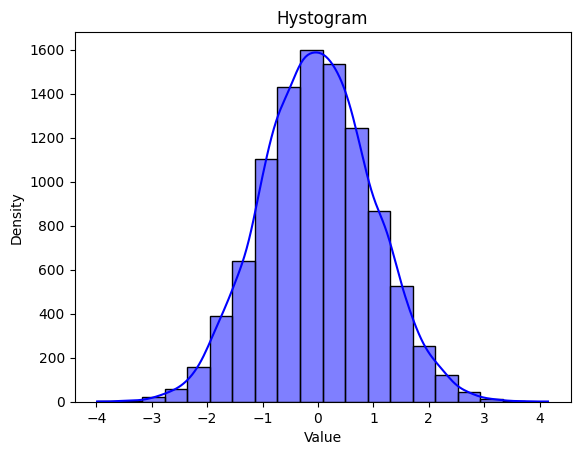

In [ ]:
length_of_distribution = 10_000
mean = 0
std_dev = 1

data = create_normal_distribution_samples(mean, std_dev, length_of_distribution)
plot_hist(data)

## 9. (Amazon Data Science Interview Question) Explain confidence intervals

Ans: Imagine you're trying to estimate something about a large group of people, like the average height of all adults in a city. It's not practical to measure everyone, so you take a sample (a smaller group) and find the average height of that sample.

Now, you want to be able to say something like, "I'm pretty sure the average height of all adults is between X inches and Y inches." But you also know that your sample might not be exactly like the whole population, so you want to express some uncertainty.

That's where confidence intervals come in. Instead of giving a single number, you provide a range. This range is your best guess about where the true value (like the average height) is likely to fall. The wider the range, the less certain you are about the exact value.

When you see a statement like "The average height is between 65 inches and 70 inches with a 95% confidence level," it means that if you were to repeat this process many times (sampling and calculating the interval), you'd expect about 95% of those intervals to include the true average height.

In simpler terms, a confidence interval is like saying, "I'm pretty confident that the real answer is somewhere in this range." It's a way of acknowledging the uncertainty in your estimate.

In [ ]:
import numpy as np
from scipy import stats

# Generate some random data (replace this with your actual dataset)
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=50, scale=10, size=100)

# Calculate the mean and standard error of the mean (SEM)
mean = np.mean(data)
sem = stats.sem(data)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * sem

# Calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Print the result
print(f"Mean: {mean}")
print(f"Confidence Interval (95%): {confidence_interval}")

Mean: 48.96153482605907
Confidence Interval (95%): (47.18155741526743, 50.74151223685072)


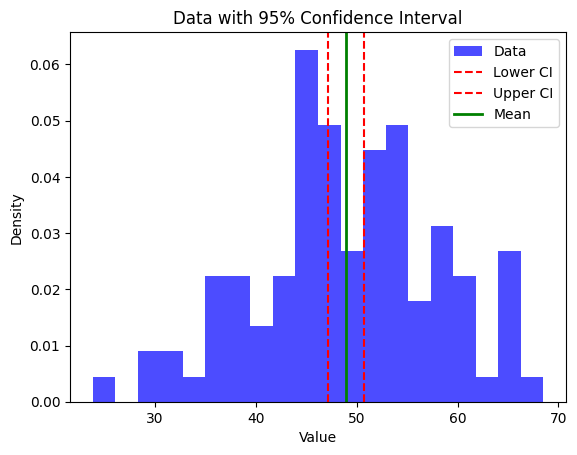

In [ ]:
# Plot the data
plt.hist(data, bins=20, density=True, alpha=0.7, color='blue', label='Data')

# Plot the confidence interval
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Upper CI')

# Plot the mean
plt.axvline(mean, color='green', linestyle='-', linewidth=2, label='Mean')

# Add labels and legend
plt.title('Data with 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

## 10. How do you manage an unbalanced dataset?

Ans : In the unbalanced dataset, the classes are distributed unequally. For example, in the fraud detection dataset, there are only 400 fraud cases compared to 300,000 non-fraud cases. The unbalanced data will make the model perform worse in detecting fraud.

To handle imbalanced data, you can use:

1. Undersampling
2. Oversampling
3. Creating synthetic data
4. Combination of under and over sampling

"""
Undersampling

It resamples majority class features to make them equal to the minority class features.

In the fraud detection dataset, both classes will be equal to 400 samples. You can use imblearn.under_sampling to resample your dataset with ease.
"""

from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(random_state=1)
X_US, y_US = RUS.fit_resample(X_train, y_train)

"""
Oversampling

It resamples minority class features to make them equal to the majority class features. Repetition or weightage repetition of the minority class features are some of the common methods used in balancing the data. In short, both classes will have 300K samples.
"""

from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=0)
X_OS, y_OS = ROS.fit_resample(X_train, y_train)

#### Combination of under and over sampling

To improve model biases and performance, you can use a combination of over and under-sampling. We will use SMOTE for over-sampling and EEN (Edited Nearest Neighbours) for cleaning.

The imblearn.combine provides us with various functions that automatically perform both sampling functions.


from imblearn.combine import SMOTEENN

SMTN = SMOTEENN(random_state=0)
X_OUS, y_OUS = SMTN.fit_resample(X_train, y_train)

## 11. What are dimensionality reduction and its benefits?

Ans: Dimensionality reduction is a process that converts the dataset from several dimensions into fewer dimensions while maintaining similar information.

Benefits of dimensionality reduction:

Compressing the data and reducing the storage space.
Reduce computational time and allow us to perform faster data processing.  
It removes redundant features, if any.

### need more info on PCA